In [1]:
###### Config #####
import sys, os, platform
if os.path.isdir("ds-assets"):
  !cd ds-assets && git pull
else:
  !git clone https://github.com/lutzhamel/ds-assets.git
colab = True if 'google.colab' in os.sys.modules else False
system = platform.system() # "Windows", "Linux", "Darwin"
home = "ds-assets/assets/"
sys.path.append(home)  

Already up to date.


In [2]:
# notebook level imports
import pandas
import math                      # sqrt
import dsutils
import seaborn as sns; sns.set_theme()
from matplotlib.pyplot import show
from sklearn import cluster      # KMeans
from sklearn import datasets     # make_blobs

In [3]:
# we need this for our cluster plots
# this is set up for 6 clusters
palette=['yellow','blue','green','grey','brown','black']

# Unsupervised Learning: Clustering
Unsupervised learning broadly falls into two categories:

1. Dimension reduction
1. Clustering

Here we focus on clustering of data.
**Unsupervised machine learning as clustering is the machine learning task of inferring a function that describes the hidden structure from unlabeled data**,

> In unlabeled data a concept, classification, or categorization is not included with the observations, that is, there is no target or dependent variable in the dataset under investigation!


# The k-Means Algorithm


Perhaps the most wellknown clustering algorithm is the k-means algorithm.
The k-means algorithm searches for a pre-determined number of clusters within an unlabeled, numeric dataset.
The k-means algorithm uses the following definition of a cluster,

* The cluster center is the arithmetic mean of all the points belonging to that cluster.
* Each point is closer to its own cluster center than to any other cluster center in the dataset.

Those two assumptions are the basis of the k-means model.  The 'k' in the name comes from the fact that we are searching for a predetermined number of clusters.  The 'mean' in the name comes from the fact that cluster centers are the arithmetic means of the points belonging to that cluster.

Source: [Wikipedia](https://en.wikipedia.org/wiki/K-means_clustering)

# Visualization of k-Means

Before we take a look at the algorithm itself let's build up some intuition by visualizing the k-means model.  As stated before, the model is simply a set of k points in the same data dimensionality as the training data and the k-means algorithm places those points at the centers of the clusters it found. Here we visualize the k-means model on a synthetic 2D dataset where we know the number of clusters contained in the data.

In [4]:
# generate data with 4 clusters.
data = datasets.make_blobs(n_samples=300, 
                           n_features=2,
                           centers=4, 
                           cluster_std=0.60, 
                           random_state=0)\
                [0] # only return the coordinates of the points
print(type(data))
print(data.shape)

<class 'numpy.ndarray'>
(300, 2)


The data array has the coordinates of our generated points.  Turn the ndarray into a dataframe so we can add metadata.

In [5]:
X = pandas.DataFrame(data, columns=['x','y'])
X.head(n=10)

,x,y
0,0.836857,2.136359
1,-1.413658,7.409623
2,1.155213,5.099619
3,-1.018616,7.814915
4,1.271351,1.892542
5,3.437618,0.261654
6,-1.808223,1.597017
7,1.413724,4.381177
8,-0.204932,8.432097
9,-0.711100,8.660438


<Axes: xlabel='x', ylabel='y'>

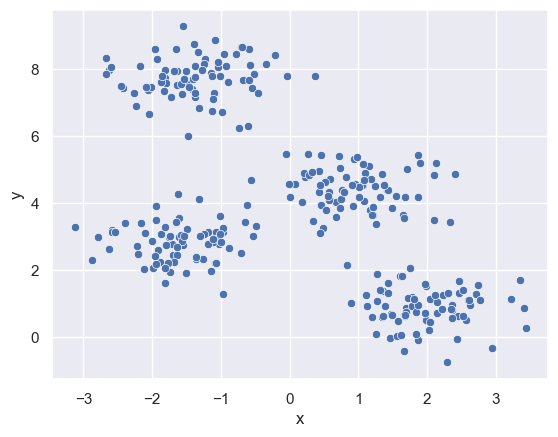

In [6]:
# plot the data 
sns.scatterplot(x=X['x'], y=X['y'])


We can clearly see our first requested clusters. Now let's build a cluster model on this data.

In [7]:
# build a k-means model with k=4
model = cluster.KMeans(n_clusters=4) \
               .fit(X)


In [8]:

# grab the cluster centers from the model
centers = pandas.DataFrame(model.cluster_centers_,
                           columns=['x','y'])
centers

,x,y
0,1.982583,0.867713
1,0.949735,4.419069
2,-1.373244,7.753689
3,-1.584385,2.830813


We see the four centroids of the cluster model as expected.

In [9]:
# assign each point in our dataset to a cluster
labels = pandas.DataFrame(model.predict(X),
                          columns=['labels'])
labels.head(n=10)

,labels
0,0
1,2
2,1
3,2
4,0
5,0
6,3
7,1
8,2
9,2


<Axes: xlabel='x', ylabel='y'>

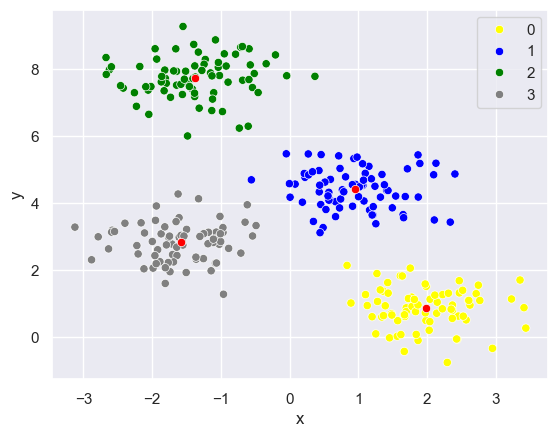

In [10]:
# plot dataset color coded according to cluster membership
sns.scatterplot(x=X['x'], 
                y=X['y'], 
                hue=labels['labels'],  # needs a vector
                palette=palette[:4],   # grab the first 4 colors
                legend=True)

# plot centers
sns.scatterplot(x=centers['x'], 
                y=centers['y'], 
                color='red')


# A More Detailed Look at k-Means

The k-means algorithm consists of the following steps:

* Guess some cluster centers
* Repeat until converged
    1. E-step: assign points to their nearest cluster center
    1. M-Step: set the cluster centers to the mean of the points currently assigned to them

Here the "E-step" or "Expectation step" is so-named because it involves updating our expectation of which cluster each point belongs to - in this context expectation is just a fancy word of mean/average.

The "M-step" or "Maximization step" is so-named because it involves maximizing/optimizing the mean of the points in each cluster.

Here is a visualization of the process,

![kmeans-steps](https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/kmeans.gif)


[Demo](https://homepage.cs.uri.edu/faculty/hamel/kmeans/kmeans.html)

# The k in k-Means

One of the big drawbacks of the k-means algorithm is the necessity to "guess" the correct number of clusters to find in the data. Consider the consequences of an incorrect value for k.  

First we consider the case where **k is picked too large**.  Here we have four actual clusters in the data but we are searching for 6.  Notice that k-means starts to split existing clusters into non-existing sub-clusters.

<Axes: xlabel='x', ylabel='y'>

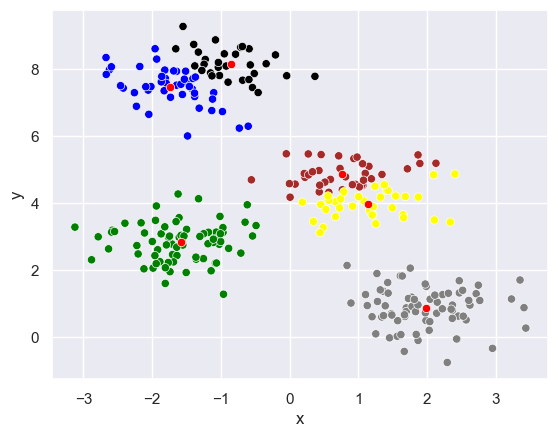

In [11]:
# cluster our blobs with a value for k that is too large
model = cluster.KMeans(n_clusters=6) \
               .fit(X)
labels = model.predict(X)
centers = pandas.DataFrame(model.cluster_centers_, columns=['x','y'])

# plot clusters by color according to cluster model
sns.scatterplot(x=X['x'], 
                y=X['y'],
                hue=labels,
                palette=palette,
                legend=False)

# plot centers
sns.scatterplot(x=centers['x'], 
                y=centers['y'], 
                color='red')

**Observation**: k-means has to assign the centroids to something, note that it starts to break down existing clusters into non-existing smaller clusters.

Next we consider the case where **we select k too small**.  Here we select k to be the value 2. Notice how k-means starts to merge existing clusters.

<Axes: xlabel='x', ylabel='y'>

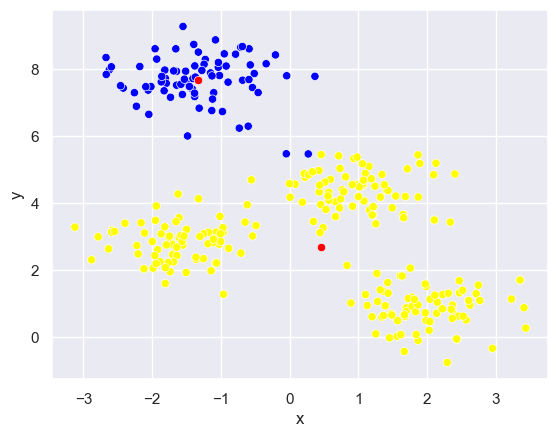

In [12]:
# cluster blobs with non-optimal value for k
model = cluster.KMeans(n_clusters=2) \
               .fit(X)
labels = model.predict(X)
centers = pandas.DataFrame(model.cluster_centers_, columns=['x','y'])


# plot clusters by color according to cluster model
sns.scatterplot(x=X['x'], 
                y=X['y'],
                hue=labels,
                palette=palette[:2],
                legend=False)

# plot centers
sns.scatterplot(x=centers['x'], 
                y=centers['y'], 
                color='red')

**Observation**: k-means does not have enough centroids to model all the clusters.  Assigns a single centroid to multiple clusters.

# The Elbow Method

We will use the elbow method in order to determine the optimal value for k.  The elbow method computes a series cluster models and
computes the variance within the found clusters.  The characteristic crick in the curve  of the elbow is where the variance within the clusters changes drastically.  Increasing k beyond the value at the crick will not improve the model.  In fact, it is likely that it will lead to "phantom" clusters as we saw above when we picked k too large where large, coherent clusters are split due to the fact that k-means has to find exactly k clusters.


We have the following definition for **variance** in a cluster,

> The variance of a cluster is defined as the average of squared distances of the points in the cluster from the cluster center.

More precisely, if we let $\hat{c}$ be the cluster center, $x_k$ a point in the cluster, and $n$ the number of points in the cluster then

$$
\sigma^2 = \frac{1}{n} \sum_i^n (\hat{c} - x_i)^2
$$


**Observation**: For points tightly clustered around the cluster center $\sigma^2$ will be small and for points loosely clustered around the cluster center $\sigma^2$ will be large.

**Note**: We let the standard deviation $\sigma$ be,
$$
\sigma = \sqrt{\sigma^2}
$$

## Example of Low Variance Clusters

<Axes: xlabel='x', ylabel='y'>

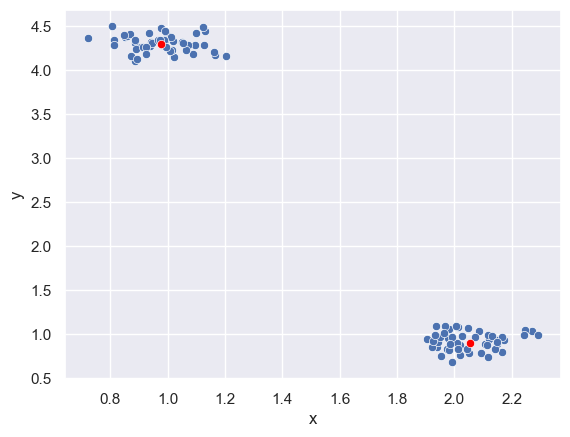

In [13]:
var = 0.01  # low variance

# generate high density cluster
points,labels,centroids = datasets.make_blobs(n_samples=100,
                                              centers=2,
                                              cluster_std=math.sqrt(var),
                                              return_centers=True,
                                              random_state=0)
X = pandas.DataFrame(points, columns=['x','y'])
centers = pandas.DataFrame(centroids, columns=['x','y'])

# plot clusters
sns.scatterplot(x=X['x'], y=X['y'])
sns.scatterplot(x=centers['x'], y=centers['y'], color='red')

## Example of High Variance Clusters

<Axes: xlabel='x', ylabel='y'>

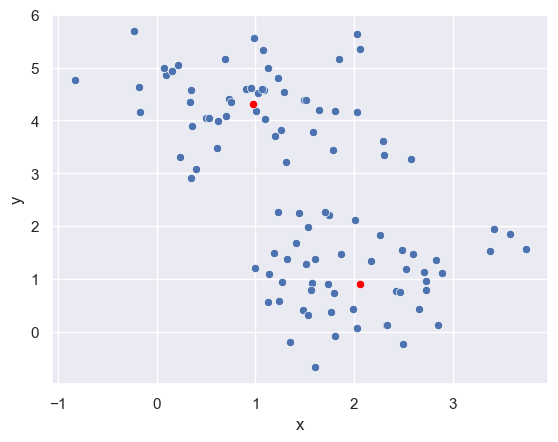

In [14]:
var = 0.5  # high variance

# generate high density cluster
points,labels,centroids = datasets.make_blobs(n_samples=100,
                                              centers=2,
                                              cluster_std=math.sqrt(var),
                                              return_centers=True,
                                              random_state=0)
X = pandas.DataFrame(points, columns=['x','y'])
centers = pandas.DataFrame(centroids, columns=['x','y'])

# plot clusters
sns.scatterplot(x=X['x'], y=X['y'])
sns.scatterplot(x=centers['x'], y=centers['y'], color='red')

## The Elbow Plot

This following code demonstrates this.  As long as we pick the k from the elbow of the curve we obtain good cluster models.

In [15]:
# pick number of clusters to generate
k_data = 3

In [16]:
# generate the data
X = pandas.DataFrame(datasets.make_blobs(n_samples=k_data*100,
                                         n_features=2,
                                         centers=k_data,
                                         cluster_std=0.60,
                                         random_state=0)[0],
                     columns=['x','y'])                                   

<Axes: xlabel='x', ylabel='y'>

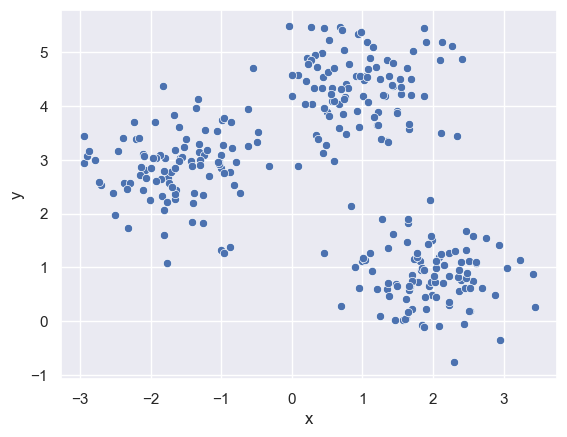

In [17]:
# plot clusters
sns.scatterplot(x=X['x'], y=X['y'])

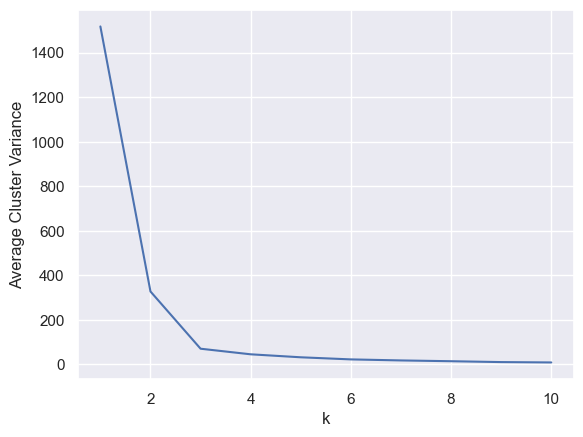

In [18]:

# generate elbow plot
dsutils.plot_elbow(X)

In [19]:
# read a value for k from the graph
k_pick = 3

/var/folders/hn/tmp2qv254hz5jxlr4dd_vc540000gn/T/ipykernel_88361/2121139342.py:6: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.scatterplot(x=X['x'], y=X['y'], hue=labels, palette=palette, legend=False)


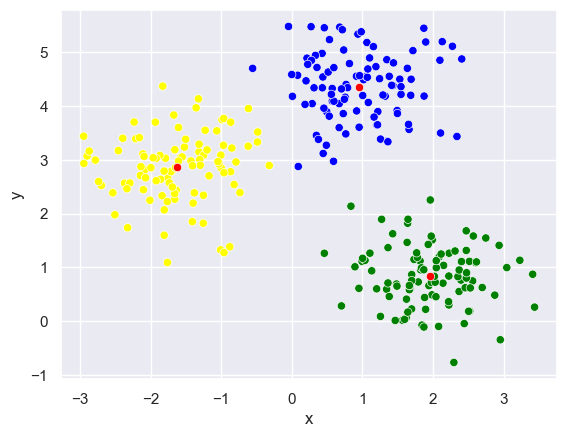

In [20]:

# build model for the given k
model = cluster.KMeans(n_clusters=k_pick).fit(X)
labels = model.predict(X)

# plot clusters by color according to cluster model
sns.scatterplot(x=X['x'], y=X['y'], hue=labels, palette=palette, legend=False)

# plot centers
centers = pandas.DataFrame(model.cluster_centers_, columns=['x','y'])
sns.scatterplot(x=centers['x'], y=centers['y'], color='red')
show()

# Why Clustering is Interesting

Sure, k-means can discover clusters in data but why is that interesting?  It is interesting because,

> The centroids of the clusters tell us the **average** properties of the points that belong to the individual clusters.

Consider our iris dataset.  We know from our previous work with this dataset that there are three clusters, one for each type of Iris flower.



In [21]:
# get data
df = pandas.read_csv(home+"iris.csv")
df.head()

,id,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [22]:
# Build the training data
X = df.drop(columns=['id','Species'])
y = df['Species']

<Axes: xlabel='Petal.Length', ylabel='Petal.Width'>

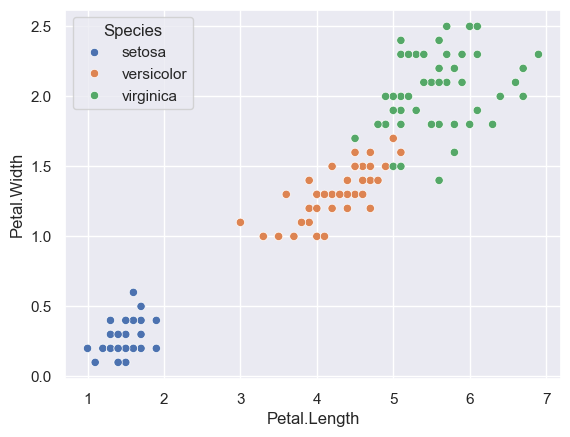

In [23]:
# visualize a 2-D view of the dataset just to get a feel for the clusters
sns.scatterplot(data=X, x='Petal.Length', y='Petal.Width', hue=y)

**Question**: Can we recover those three clusters using k-means?

First step, we see if the elbow method leads us to a correct value of k.

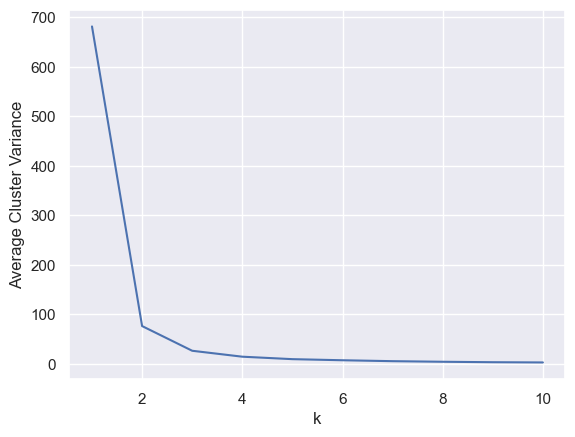

In [24]:
dsutils.plot_elbow(X)

Sure enough, the elbow is right at k=3 or k=4.

Next step. Let's build out k-means model with k=3 and plot the model on top of the dataset.  We hope to see that the centroids will wind up in the center of the clusters.

<Axes: xlabel='Petal.Length', ylabel='Petal.Width'>

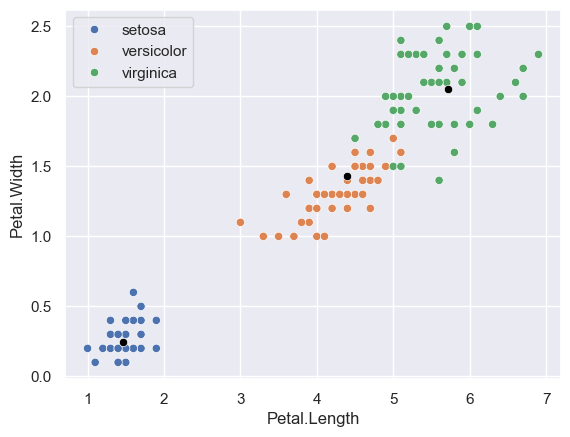

In [25]:
# fit model
k = 3 # from elbow plot
model = cluster.KMeans(n_clusters=k).fit(X)

# plot data by color according to the original cluster
sns.scatterplot(data=X, x='Petal.Length', y='Petal.Width', hue=y)

# plot centers
centers = pandas.DataFrame(model.cluster_centers_, columns=X.columns)
sns.scatterplot(x=centers['Petal.Length'], y=centers['Petal.Width'], color='black')

As expected, the centers of the clusters wind up right in the middle of the data clusters.  Bear in mind that we are looking at a 2-D projection of the dataset and in that projection the centers might not appear to be exactly the arithmetic mean.  However, if we could plot a 4-D dataset then we would find that the centers are exactly at the arithmetic mean of the data clusters.

Final step. We can now retrieve the cluster centroids and see the average properties of the points within each cluster.

In [26]:
centroids = model.cluster_centers_
centroids_df = pandas.DataFrame(centroids, columns=X.columns)
centroids_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.006000,3.428000,1.462000,0.246000
1,6.853846,3.076923,5.715385,2.053846
2,5.883607,2.740984,4.388525,1.434426


<!--
# Final Project Proposal

The final project could be a (team) app (e.g. Python script that implements some non-trivial functionality with/without visualization or an app built on your favorite platform) or it can be an individual analysis project.

Details in BrightSpace.
-->


We can relate the k-means labels back to the flower labels by checking where the centroid falls in our graph:

* Label 0 describes versicolor
* Label 1 describes virginica
* Label 2 describes setosa

We can incorporate this information into our centroids dataframe.

In [27]:
centroids_df.index = ['versicolor','virginica','setosa']
centroids_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
versicolor,5.006000,3.428000,1.462000,0.246000
virginica,6.853846,3.076923,5.715385,2.053846
setosa,5.883607,2.740984,4.388525,1.434426


The centroids now tell us the average properties of each flower.  We can check if our model is correct by looking at the training data for each flower.

In [28]:
df[df.Species == 'versicolor'].drop(columns=['id','Species']).describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [29]:
df[df.Species == 'virginica'].drop(columns=['id','Species']).describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


In [30]:
df[df.Species == 'setosa'].drop(columns=['id','Species']).describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000


If we look at the 'mean' row for each of the flowers we see that our model and the values here are very close. Recall that in a typical clustering application we do not have access to labels as we have here and the estimate of the model is all we have in terms explanation.